In [ ]:
%load_ext Cython

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.animation import FuncAnimation

matplotlib.rcParams['animation.embed_limit'] = 1000

In [6]:
%%cython

import numpy as np
cimport numpy as np
from libc.math cimport exp
np.import_array()

cdef int N = 64
cdef float w_stay = 0.7
cdef float w_change = 1 - w_stay

cdef float c_bump(float x, float a, float b):
    return exp(-a * (x+b)**2)

def c_update(np.ndarray cells):
    cdef np.ndarray newCells = np.zeros([N, N], dtype=np.float32)
    cdef int i, j, di, dj
    cdef float neighbors
    for i in range(N):
        for j in range(N):
            neighbors = 0.0
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    neighbors += cells[(i + di) % N][(j + dj) % N]
            newCells[i][j] = w_change*c_bump(neighbors, 1 + cells[i][j], -(2.5 + cells[i][j]/2)) + w_stay*cells[i][j]
    return newCells

MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
100
200


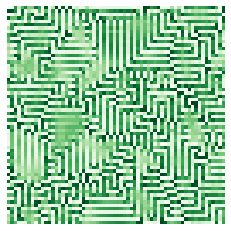

In [7]:
from IPython.display import HTML

N = 64
cells = np.random.uniform(0.0, 1.0, size=(N, N))
fig = plt.figure()
plt.axis('off')
im = plt.imshow(cells, interpolation='nearest', animated=True, cmap='Greens')

def animate(i):
    if i % 100 == 0:
        print(i)
    global cells
    cells = c_update(cells)
    im.set_data(cells)
    return [im]

fps = 12
frames = 300
anim = FuncAnimation(fig, animate, frames=frames, interval=frames/fps)
# HTML(anim.to_jshtml())
anim.save('conway_green.gif', fps=fps, bitrate=-1)